ML PROJECT ON SLEEP QUALITY

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**COMBINING THE GIVEN DATASETS INTO ONE SINGLE DATASET**

In [ ]:
df1 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC1.csv", header = None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.13770,-0.78326,-0.72821,-1.30810,0.71241,-1.15460,-1.21720,1.74920,0.60935,-1.37700,-1.30780,-0.697440,-1.06690,1.86660,-1.03540
1,-0.93703,-0.16375,0.32545,-1.16010,0.13397,-0.93057,-1.11390,1.22920,0.52222,-0.87295,-1.15980,-0.258450,-1.04140,2.01890,-0.95348
2,-0.87882,-1.03170,-0.74039,-1.00300,0.57247,-0.78881,-0.94716,1.76390,0.96157,-0.58891,-1.00280,-0.074423,-0.66255,1.31660,-0.83350
3,-0.81328,-0.47618,-0.01379,-0.92353,0.80455,-0.81035,-0.90316,1.71100,0.72966,-0.69230,-0.92341,-0.618610,-0.78337,0.94421,-0.80556
4,-0.49330,-0.63534,0.29655,-0.31032,-0.30882,-0.22440,-0.43386,-0.59472,0.84042,0.29545,-0.30986,-0.347410,-0.35576,0.48155,-0.51734


In [ ]:
df1.shape

(800, 15)

In [ ]:
df2 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC1-label.csv", header = None)
df2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
sc1 = pd.concat([df1, df2], axis = 1, join='inner', ignore_index=True)
display(sc1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.13770,-0.783260,-0.72821,-1.30810,0.71241,-1.15460,-1.21720,1.749200,0.60935,-1.377000,-1.30780,-0.697440,-1.06690,1.86660,-1.03540,1
1,-0.93703,-0.163750,0.32545,-1.16010,0.13397,-0.93057,-1.11390,1.229200,0.52222,-0.872950,-1.15980,-0.258450,-1.04140,2.01890,-0.95348,1
2,-0.87882,-1.031700,-0.74039,-1.00300,0.57247,-0.78881,-0.94716,1.763900,0.96157,-0.588910,-1.00280,-0.074423,-0.66255,1.31660,-0.83350,1
3,-0.81328,-0.476180,-0.01379,-0.92353,0.80455,-0.81035,-0.90316,1.711000,0.72966,-0.692300,-0.92341,-0.618610,-0.78337,0.94421,-0.80556,1
4,-0.49330,-0.635340,0.29655,-0.31032,-0.30882,-0.22440,-0.43386,-0.594720,0.84042,0.295450,-0.30986,-0.347410,-0.35576,0.48155,-0.51734,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.14330,-1.269100,-1.65080,-1.26020,1.27230,-1.34670,-1.17620,1.502900,1.16730,-1.227700,-1.26080,-0.727320,-1.40020,0.45934,-1.03850,1
796,-0.57652,0.030398,0.59556,-0.57406,0.30119,-0.52280,-0.64426,-0.172680,0.77318,-0.023352,-0.57365,0.495910,-0.64828,0.53790,-0.64077,1
797,-0.47490,-0.286470,-0.41822,-0.25216,0.70250,-0.18865,-0.39041,0.057464,0.58734,0.109760,-0.25171,0.486880,-0.16952,0.40607,-0.45976,1
798,-0.73931,-0.225210,0.39551,-0.80272,0.19679,-0.84966,-0.80853,0.213560,0.77356,-0.294690,-0.80251,-0.069902,-0.98077,0.26810,-0.78523,1


In [ ]:
df3 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC2.csv", header = None)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.0099,-1.4879,-1.8707,-1.0286,1.16770,-0.93503,-0.98235,0.97968,1.1160,-1.0390,-1.0284,-0.87195,-0.8920,0.96102,-0.93698
1,-1.4515,-2.6183,-2.9398,-1.6963,1.19930,-1.85720,-1.56300,1.17680,1.3847,-1.7875,-1.6962,-1.29740,-1.9073,1.22510,-1.19530
2,-1.2915,-2.0964,-1.1943,-1.5179,1.70940,-1.55320,-1.40710,0.86105,1.6900,-1.5464,-1.5180,-1.15630,-1.5997,1.52530,-1.12670
3,-1.3368,-2.0558,-1.3084,-1.5046,0.88638,-1.69080,-1.39790,1.20390,2.0688,-1.5494,-1.5044,-1.23540,-1.7485,0.37360,-1.14610
4,-1.4439,-2.1969,-3.0139,-1.7015,1.28180,-1.85750,-1.55480,0.73406,2.2873,-1.7323,-1.7013,-1.40380,-1.9404,1.07380,-1.19360


In [ ]:
df4 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC2-label.csv", header = None)
df4.head()

,0
0,2
1,2
2,2
3,2
4,2


In [ ]:
sc2 = pd.concat([df3, df4], axis = 1, join='inner', ignore_index=True)
display(sc2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.0099,-1.4879,-1.8707,-1.0286,1.16770,-0.93503,-0.98235,0.97968,1.11600,-1.0390,-1.0284,-0.87195,-0.8920,0.96102,-0.93698,2
1,-1.4515,-2.6183,-2.9398,-1.6963,1.19930,-1.85720,-1.56300,1.17680,1.38470,-1.7875,-1.6962,-1.29740,-1.9073,1.22510,-1.19530,2
2,-1.2915,-2.0964,-1.1943,-1.5179,1.70940,-1.55320,-1.40710,0.86105,1.69000,-1.5464,-1.5180,-1.15630,-1.5997,1.52530,-1.12670,2
3,-1.3368,-2.0558,-1.3084,-1.5046,0.88638,-1.69080,-1.39790,1.20390,2.06880,-1.5494,-1.5044,-1.23540,-1.7485,0.37360,-1.14610,2
4,-1.4439,-2.1969,-3.0139,-1.7015,1.28180,-1.85750,-1.55480,0.73406,2.28730,-1.7323,-1.7013,-1.40380,-1.9404,1.07380,-1.19360,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.1031,-1.0694,-1.1587,-1.1779,1.15570,-1.16420,-1.13440,0.94378,0.90865,-1.2098,-1.1775,-0.96954,-1.1741,1.05370,-1.01990,2
796,-1.0906,-1.2698,-1.5226,-1.1472,1.92250,-1.19220,-1.08180,1.29970,1.33190,-1.1597,-1.1469,-0.82592,-1.2605,0.51884,-1.00540,2
797,-1.2554,-1.8676,-2.2761,-1.4267,1.00260,-1.49110,-1.32200,1.40060,1.53360,-1.2457,-1.4265,-1.07460,-1.5597,0.94437,-1.10220,2
798,-1.1490,-1.5219,-1.9334,-1.2368,1.85390,-1.31930,-1.16290,0.78262,1.24300,-1.2064,-1.2367,-1.15670,-1.4021,0.49739,-1.04930,2


In [ ]:
df5 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC3.csv", header = None)
df5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.03020,0.87802,1.147600,0.93866,-0.45098,0.91047,1.0309,-1.09190,-0.24662,1.18270,0.93862,5.26070,0.69024,-0.92818,0.88343
1,1.22160,1.03470,1.190500,1.01600,-0.90213,0.97861,1.2070,-1.15950,-0.49064,0.82412,1.01680,2.42020,0.87143,-1.09340,0.96907
2,0.95067,0.83982,1.010100,1.18900,-0.76799,1.06880,1.0807,-1.19410,-0.40821,0.81300,1.18970,1.61890,0.97946,-0.79694,0.99646
3,1.14840,0.96882,-0.059307,1.05240,-0.99597,1.40450,1.1075,-0.50186,-0.61655,0.62189,1.05310,-1.31880,1.38270,-0.40680,1.16570
4,1.33100,1.03950,0.970960,1.10750,-0.70602,1.31640,1.1284,-0.84857,-1.06770,1.16180,1.10800,0.78181,1.29100,-0.55297,1.31150


In [ ]:
df6 = pd.read_csv("/content/gdrive/MyDrive/ML_midterm_data/SC3-label.csv", header = None)
df6.head()

,0
0,3
1,3
2,3
3,3
4,3


In [ ]:
sc3 = pd.concat([df5, df6], axis = 1, join='inner', ignore_index=True)
display(sc3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.030200,0.87802,1.147600,0.93866,-0.450980,0.910470,1.03090,-1.09190,-0.24662,1.18270,0.93862,5.26070,0.690240,-0.92818,0.883430,3
1,1.221600,1.03470,1.190500,1.01600,-0.902130,0.978610,1.20700,-1.15950,-0.49064,0.82412,1.01680,2.42020,0.871430,-1.09340,0.969070,3
2,0.950670,0.83982,1.010100,1.18900,-0.767990,1.068800,1.08070,-1.19410,-0.40821,0.81300,1.18970,1.61890,0.979460,-0.79694,0.996460,3
3,1.148400,0.96882,-0.059307,1.05240,-0.995970,1.404500,1.10750,-0.50186,-0.61655,0.62189,1.05310,-1.31880,1.382700,-0.40680,1.165700,3
4,1.331000,1.03950,0.970960,1.10750,-0.706020,1.316400,1.12840,-0.84857,-1.06770,1.16180,1.10800,0.78181,1.291000,-0.55297,1.311500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.054207,-1.81270,-0.973140,1.11780,-0.947310,0.651730,0.64308,-0.42405,-1.63370,2.22520,1.11860,1.53820,0.439100,-0.64874,0.362700,3
796,1.769000,1.12270,1.114000,1.40530,-1.348900,1.226100,1.58440,-0.80974,-1.34840,1.04950,1.40520,1.77890,1.064400,-1.27920,1.652900,3
797,0.417130,1.10070,-0.015029,0.28898,-0.844170,-0.022917,0.35184,-0.17578,-0.73266,-0.32947,0.28812,-0.99158,0.080629,-1.19740,-0.031375,3
798,1.505100,1.13910,0.992910,1.27110,-1.583700,0.844720,1.39090,-1.03520,-0.70006,0.71376,1.27160,0.21868,0.886720,-1.48770,1.296200,3


In [ ]:
SC = pd.concat([sc1, sc2, sc3], axis = 0, join='inner', ignore_index=True)
SC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.13770,-0.78326,-0.72821,-1.30810,0.71241,-1.15460,-1.21720,1.74920,0.60935,-1.37700,-1.30780,-0.697440,-1.06690,1.86660,-1.03540,1
1,-0.93703,-0.16375,0.32545,-1.16010,0.13397,-0.93057,-1.11390,1.22920,0.52222,-0.87295,-1.15980,-0.258450,-1.04140,2.01890,-0.95348,1
2,-0.87882,-1.03170,-0.74039,-1.00300,0.57247,-0.78881,-0.94716,1.76390,0.96157,-0.58891,-1.00280,-0.074423,-0.66255,1.31660,-0.83350,1
3,-0.81328,-0.47618,-0.01379,-0.92353,0.80455,-0.81035,-0.90316,1.71100,0.72966,-0.69230,-0.92341,-0.618610,-0.78337,0.94421,-0.80556,1
4,-0.49330,-0.63534,0.29655,-0.31032,-0.30882,-0.22440,-0.43386,-0.59472,0.84042,0.29545,-0.30986,-0.347410,-0.35576,0.48155,-0.51734,1


**SPLITTING THE DATASET INTO FEATURES AND TARGET VARIABLES AND LABEL ENCODING**

In [ ]:
#features and target variables
X_SC = SC.iloc[:, :14].values
y_SC = SC.iloc[:, [15]].values

In [ ]:
# encoding
le = LabelEncoder()
y_SC=le.fit_transform(y_SC)

In [ ]:
# Define the classifiers to be used
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 100)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
mlp = MLPClassifier()
classifiers = [nb, dt, rf, lda, qda, mlp]

In [ ]:
# Define the number of features to be used in each fold
n_features = X_SC.shape[1]
feature_sets = [range(i+1) for i in range(n_features)]

In [ ]:
# Define the number of folds for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Loop through each feature set and each classifier, and perform cross-validation
results = np.zeros((len(feature_sets), len(classifiers), kfold.n_splits))
for i, feature_set in enumerate(feature_sets):
    X_SC_subset = X_SC[:, feature_set]
    for j, classifier in enumerate(classifiers):
        for k, (train_idx, test_idx) in enumerate(kfold.split(X_SC_subset, y_SC)):
            X_train, X_test = X_SC_subset[train_idx], X_SC_subset[test_idx]
            y_train, y_test = y_SC[train_idx], y_SC[test_idx]
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            results[i, j, k] = accuracy_score(y_test, y_pred)

In [ ]:
# Calculate the mean accuracy over all folds for each feature set and classifier
mean_results = np.mean(results, axis=2)
mean_results

array([[0.87375   , 0.82375   , 0.82375   , 0.8575    , 0.87375   ,
        0.87666667],
       [0.9       , 0.88083333, 0.90541667, 0.8675    , 0.90333333,
        0.91041667],
       [0.89958333, 0.88541667, 0.90958333, 0.86916667, 0.90083333,
        0.91208333],
       [0.915     , 0.89      , 0.91166667, 0.89125   , 0.90666667,
        0.91833333],
       [0.91291667, 0.88958333, 0.90916667, 0.89291667, 0.90375   ,
        0.91875   ],
       [0.91375   , 0.88875   , 0.91291667, 0.90041667, 0.90125   ,
        0.91833333],
       [0.90958333, 0.89583333, 0.915     , 0.90333333, 0.9025    ,
        0.92      ],
       [0.91625   , 0.89291667, 0.915     , 0.91208333, 0.90583333,
        0.92375   ],
       [0.92125   , 0.89833333, 0.92208333, 0.915     , 0.91      ,
        0.92541667],
       [0.91416667, 0.89625   , 0.92208333, 0.91458333, 0.91      ,
        0.92958333],
       [0.90958333, 0.89458333, 0.92458333, 0.91416667, 0.905     ,
        0.925     ],
       [0.91416667, 0

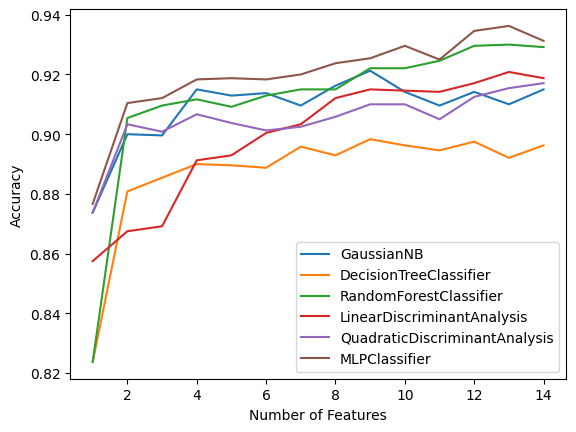

In [ ]:
# Plot the accuracy vs. number of features curve for each classifier
for j, classifier in enumerate(classifiers):
    plt.plot(range(1, n_features+1), mean_results[:, j], label=classifier.__class__.__name__)
plt.legend()
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Find the best number of features and the corresponding accuracy for each classifier
best_features = []
for j, classifier in enumerate(classifiers):
    best_feature_set = np.argmax(mean_results[:, j]) + 1
    best_accuracy = np.max(mean_results[:, j])
    best_features.append((best_feature_set, best_accuracy))

In [ ]:
# Print the best number of features and corresponding accuracy for each classifier
print("Best number of features and corresponding accuracy for each classifier:")
print()
for j, classifier in enumerate(classifiers):
    print(f"{classifier.__class__.__name__}: {best_features[j][0]} features with {best_features[j][1]:.2f} accuracy")

Best number of features and corresponding accuracy for each classifier:

GaussianNB: 9 features with 0.92 accuracy
DecisionTreeClassifier: 9 features with 0.90 accuracy
RandomForestClassifier: 13 features with 0.93 accuracy
LinearDiscriminantAnalysis: 13 features with 0.92 accuracy
QuadraticDiscriminantAnalysis: 14 features with 0.92 accuracy
MLPClassifier: 13 features with 0.94 accuracy


In [ ]:
# Choose the best number of features for each classifier
nb_features = best_features[0][0]
dt_features = best_features[1][0]
rf_features = best_features[2][0]
lda_features = best_features[3][0]
qda_features = best_features[4][0]
mlp_features = best_features[5][0]
print("Naive Bayes: ", nb_features)
print("Decision Tree: ", dt_features)
print("Random Forest: ", rf_features)
print("Linear Discriminant Analysis: ", lda_features)
print("Quadratic Discriminant Analysis: ", qda_features)
print("MLP Classifier: ", mlp_features)

Naive Bayes:  9
Decision Tree:  9
Random Forest:  13
Linear Discriminant Analysis:  13
Quadratic Discriminant Analysis:  14
MLP Classifier:  13


**Determining the test performance by demonstrating the confusion matrix, accuracy, sensitivity, specificity, F1-score, false positive rate, and false negative rate for each class using the best number of features for that class**

Test performance using the best number of features for GaussianNB() :

Number of Features: 1


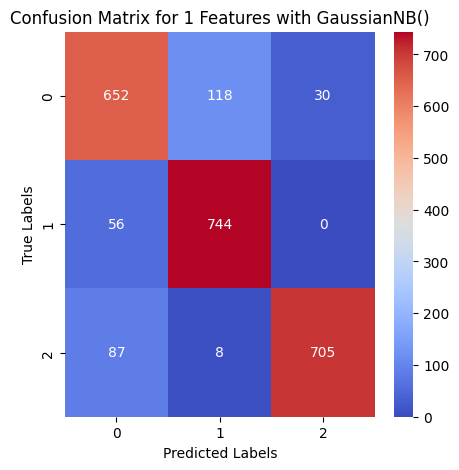


Accuracy: 0.8754
Sensitivity: 0.9209
Specificity: 0.8631
F1-score: 0.8823
False Positive Rate: 0.1369
False Negative Rate: 0.0791



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 1


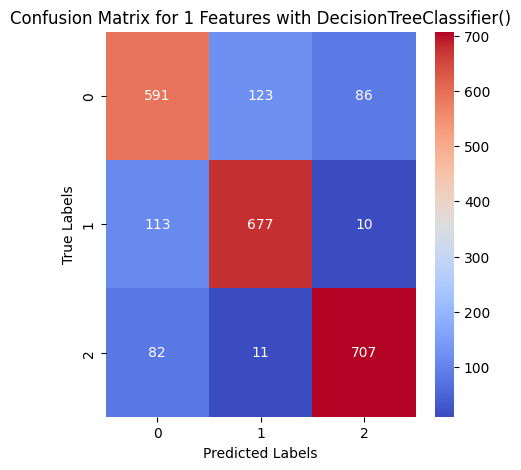


Accuracy: 0.8229
Sensitivity: 0.8395
Specificity: 0.8462
F1-score: 0.8336
False Positive Rate: 0.1537
False Negative Rate: 0.1605



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 1


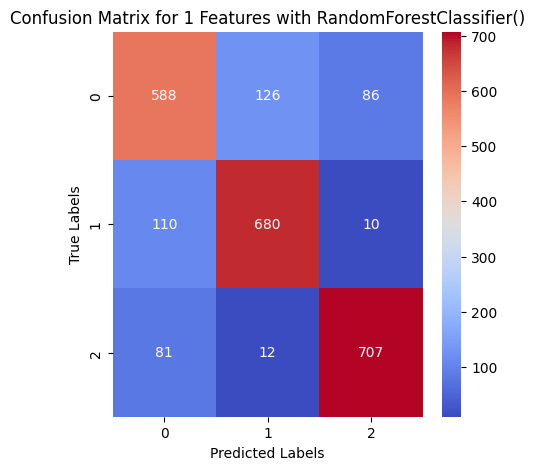


Accuracy: 0.8229
Sensitivity: 0.8424
Specificity: 0.8437
F1-score: 0.8329
False Positive Rate: 0.1563
False Negative Rate: 0.1576



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 1


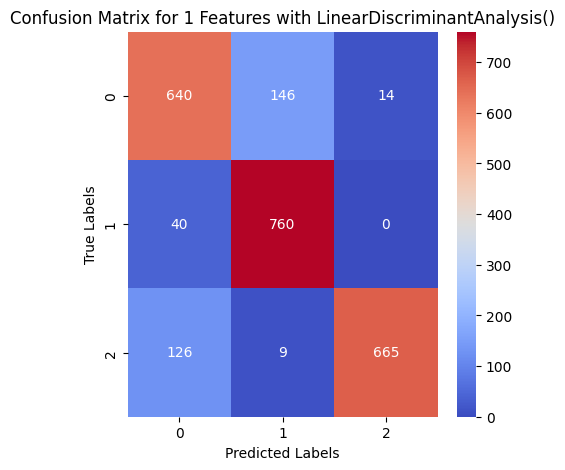


Accuracy: 0.8604
Sensitivity: 0.9412
Specificity: 0.8389
F1-score: 0.8731
False Positive Rate: 0.1611
False Negative Rate: 0.0588



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 1


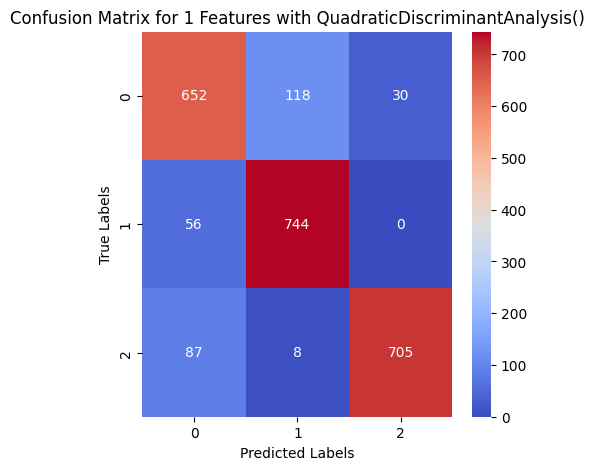


Accuracy: 0.8754
Sensitivity: 0.9209
Specificity: 0.8631
F1-score: 0.8823
False Positive Rate: 0.1369
False Negative Rate: 0.0791



Test performance using the best number of features for MLPClassifier() :

Number of Features: 1


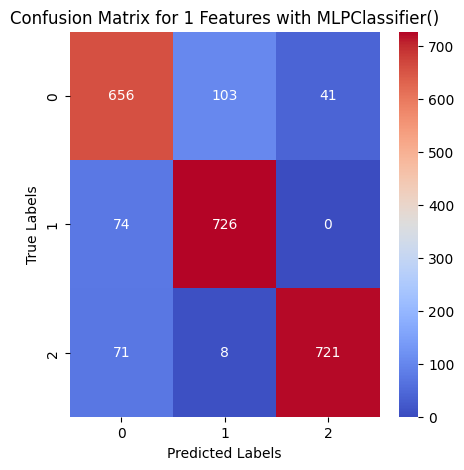


Accuracy: 0.8762
Sensitivity: 0.8986
Specificity: 0.8758
F1-score: 0.8811
False Positive Rate: 0.1242
False Negative Rate: 0.1014



Test performance using the best number of features for GaussianNB() :

Number of Features: 2


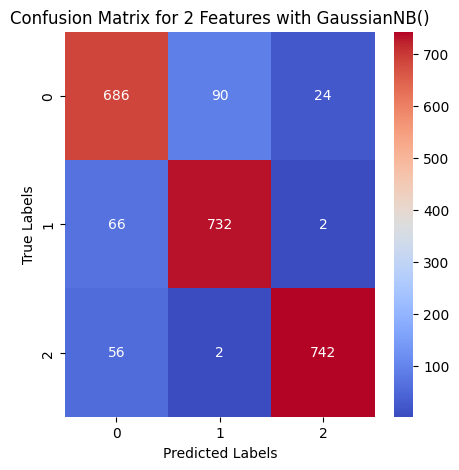


Accuracy: 0.9000
Sensitivity: 0.9122
Specificity: 0.8905
F1-score: 0.8979
False Positive Rate: 0.1095
False Negative Rate: 0.0878



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 2


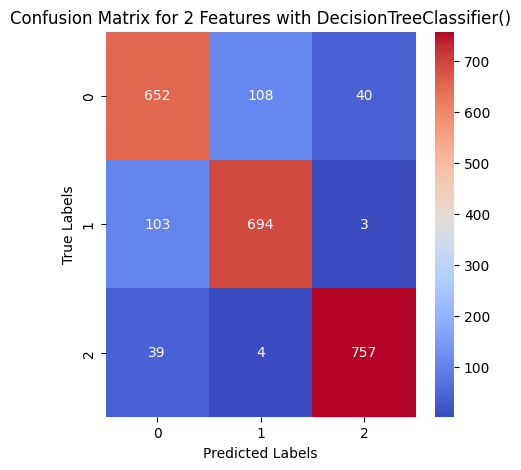


Accuracy: 0.8762
Sensitivity: 0.8636
Specificity: 0.8653
F1-score: 0.8607
False Positive Rate: 0.1347
False Negative Rate: 0.1364



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 2


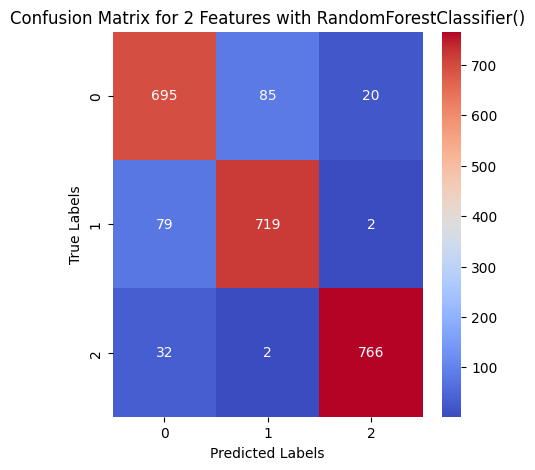


Accuracy: 0.9083
Sensitivity: 0.8979
Specificity: 0.8943
F1-score: 0.8945
False Positive Rate: 0.1057
False Negative Rate: 0.1021



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 2


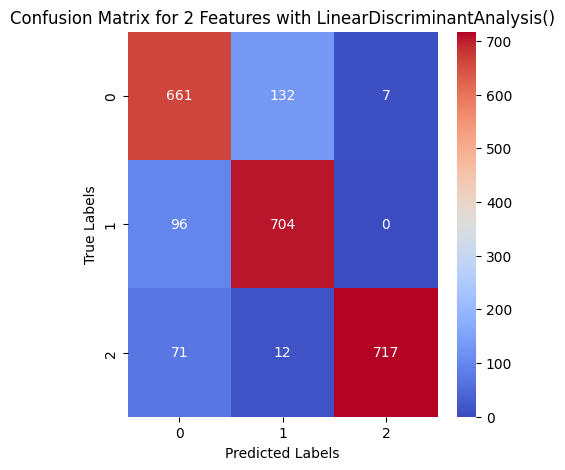


Accuracy: 0.8675
Sensitivity: 0.8732
Specificity: 0.8421
F1-score: 0.8529
False Positive Rate: 0.1579
False Negative Rate: 0.1268



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 2


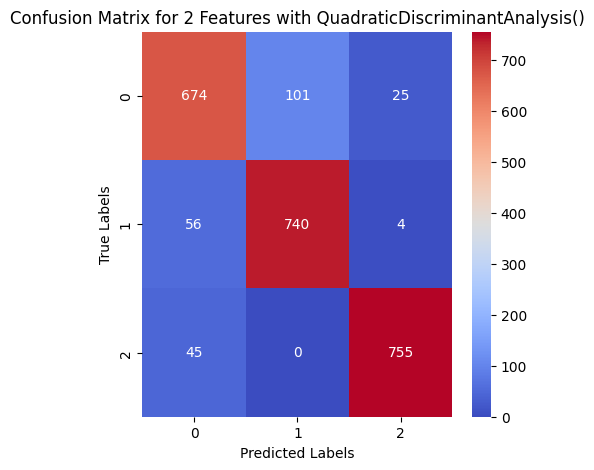


Accuracy: 0.9038
Sensitivity: 0.9233
Specificity: 0.8799
F1-score: 0.8957
False Positive Rate: 0.1201
False Negative Rate: 0.0767



Test performance using the best number of features for MLPClassifier() :

Number of Features: 2


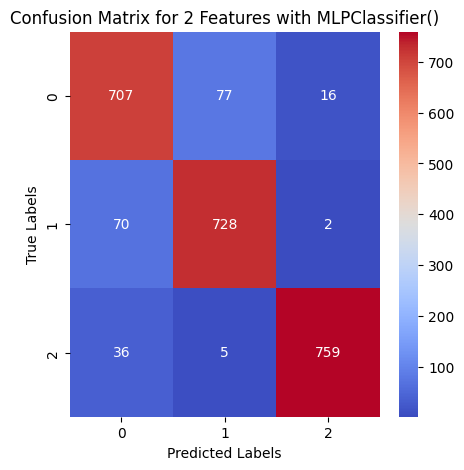


Accuracy: 0.9142
Sensitivity: 0.9099
Specificity: 0.9043
F1-score: 0.9058
False Positive Rate: 0.0957
False Negative Rate: 0.0901



Test performance using the best number of features for GaussianNB() :

Number of Features: 3


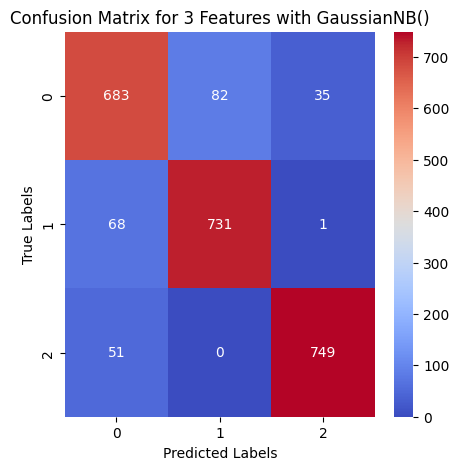


Accuracy: 0.9012
Sensitivity: 0.9095
Specificity: 0.8991
F1-score: 0.9011
False Positive Rate: 0.1009
False Negative Rate: 0.0905



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 3


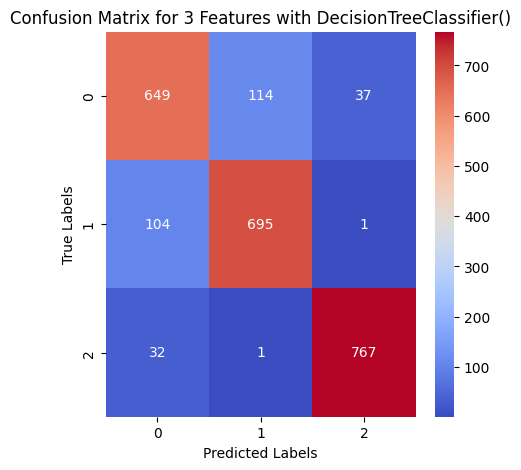


Accuracy: 0.8796
Sensitivity: 0.8619
Specificity: 0.8591
F1-score: 0.8562
False Positive Rate: 0.1409
False Negative Rate: 0.1381



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 3


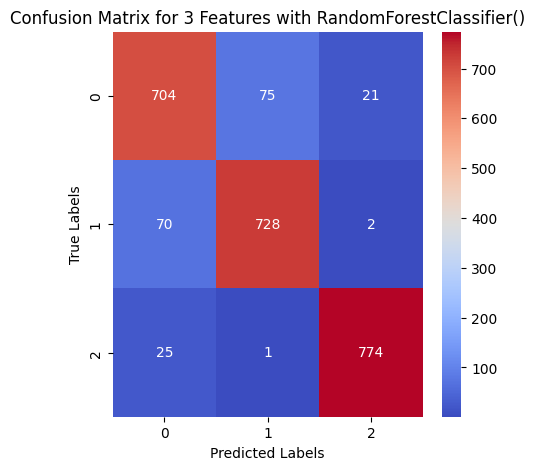


Accuracy: 0.9192
Sensitivity: 0.9096
Specificity: 0.9066
F1-score: 0.9066
False Positive Rate: 0.0934
False Negative Rate: 0.0904



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 3


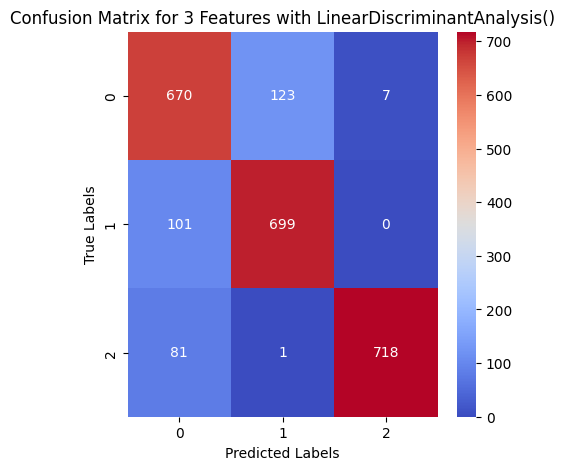


Accuracy: 0.8696
Sensitivity: 0.8690
Specificity: 0.8504
F1-score: 0.8568
False Positive Rate: 0.1496
False Negative Rate: 0.1310



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 3


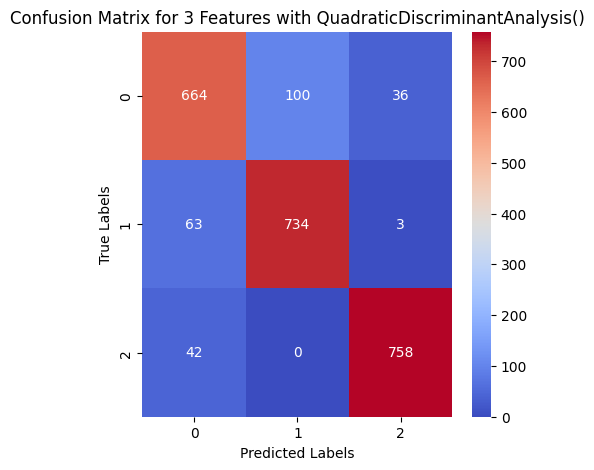


Accuracy: 0.8983
Sensitivity: 0.9133
Specificity: 0.8801
F1-score: 0.8907
False Positive Rate: 0.1199
False Negative Rate: 0.0867



Test performance using the best number of features for MLPClassifier() :

Number of Features: 3


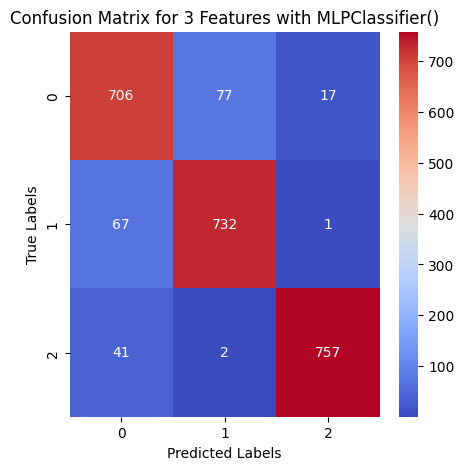


Accuracy: 0.9146
Sensitivity: 0.9133
Specificity: 0.9048
F1-score: 0.9075
False Positive Rate: 0.0952
False Negative Rate: 0.0867



Test performance using the best number of features for GaussianNB() :

Number of Features: 4


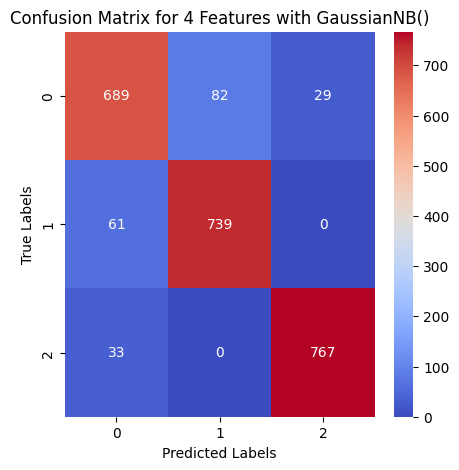


Accuracy: 0.9146
Sensitivity: 0.9187
Specificity: 0.9001
F1-score: 0.9060
False Positive Rate: 0.0999
False Negative Rate: 0.0813



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 4


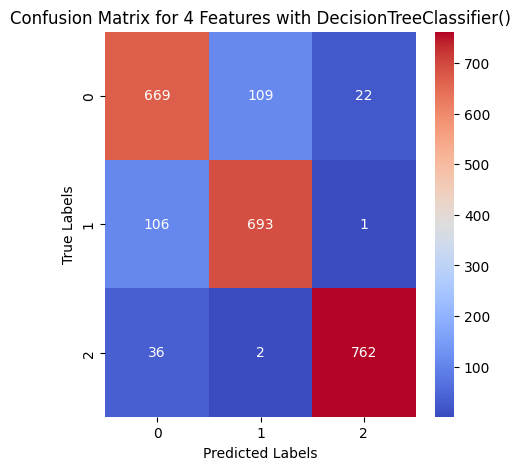


Accuracy: 0.8850
Sensitivity: 0.8632
Specificity: 0.8641
F1-score: 0.8616
False Positive Rate: 0.1359
False Negative Rate: 0.1368



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 4


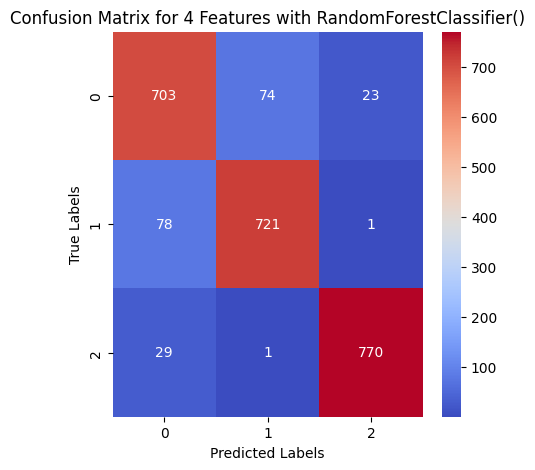


Accuracy: 0.9142
Sensitivity: 0.9001
Specificity: 0.9069
F1-score: 0.9024
False Positive Rate: 0.0931
False Negative Rate: 0.0999



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 4


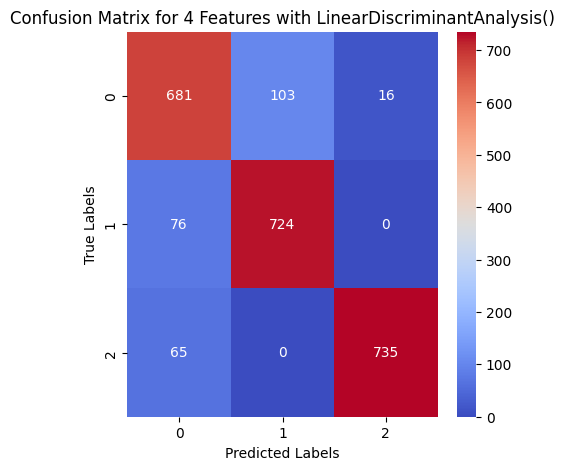


Accuracy: 0.8917
Sensitivity: 0.8996
Specificity: 0.8755
F1-score: 0.8838
False Positive Rate: 0.1245
False Negative Rate: 0.1004



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 4


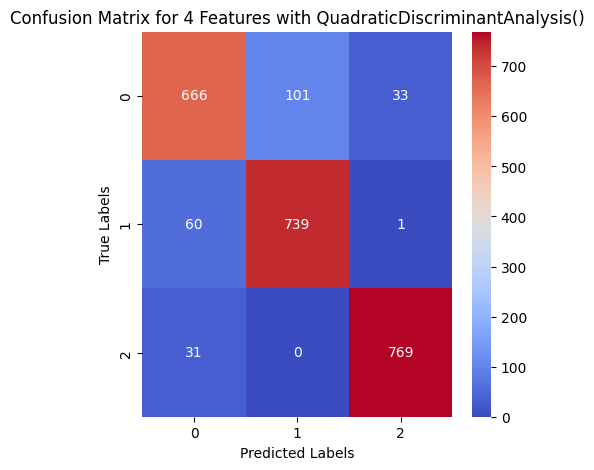


Accuracy: 0.9058
Sensitivity: 0.9174
Specificity: 0.8798
F1-score: 0.8922
False Positive Rate: 0.1202
False Negative Rate: 0.0826



Test performance using the best number of features for MLPClassifier() :

Number of Features: 4


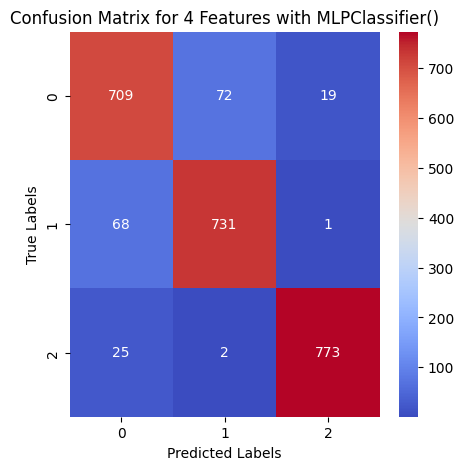


Accuracy: 0.9221
Sensitivity: 0.9125
Specificity: 0.9103
F1-score: 0.9101
False Positive Rate: 0.0897
False Negative Rate: 0.0875



Test performance using the best number of features for GaussianNB() :

Number of Features: 5


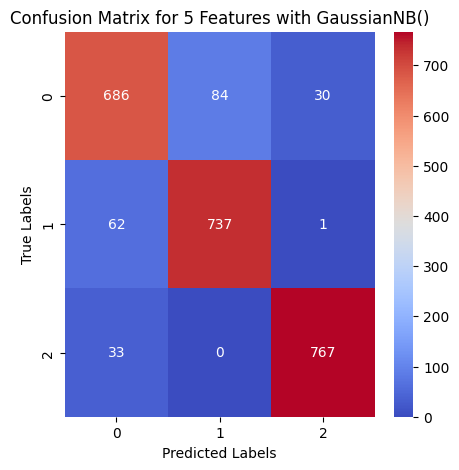


Accuracy: 0.9125
Sensitivity: 0.9171
Specificity: 0.8977
F1-score: 0.9038
False Positive Rate: 0.1023
False Negative Rate: 0.0829



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 5


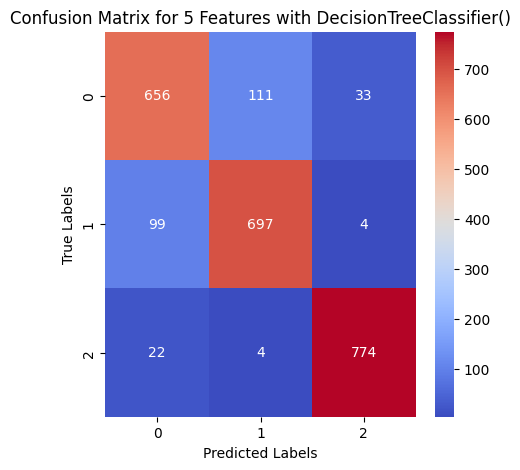


Accuracy: 0.8862
Sensitivity: 0.8689
Specificity: 0.8626
F1-score: 0.8620
False Positive Rate: 0.1374
False Negative Rate: 0.1311



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 5


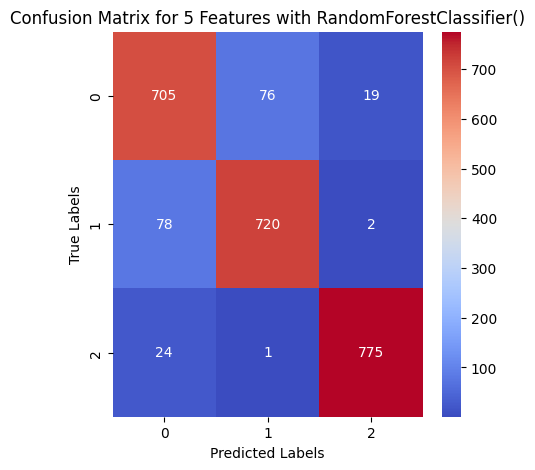


Accuracy: 0.9167
Sensitivity: 0.9004
Specificity: 0.9045
F1-score: 0.9015
False Positive Rate: 0.0955
False Negative Rate: 0.0996



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 5


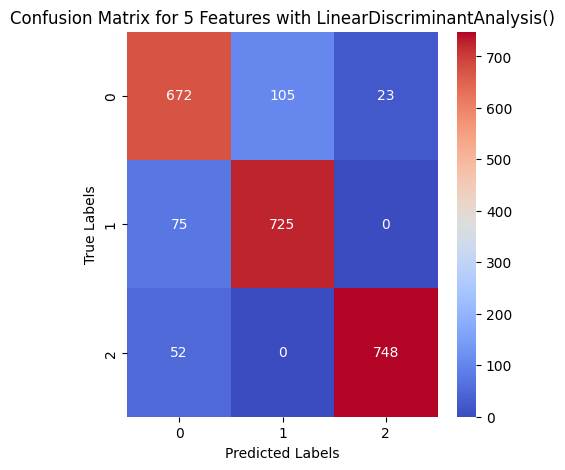


Accuracy: 0.8938
Sensitivity: 0.8996
Specificity: 0.8735
F1-score: 0.8819
False Positive Rate: 0.1265
False Negative Rate: 0.1004



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 5


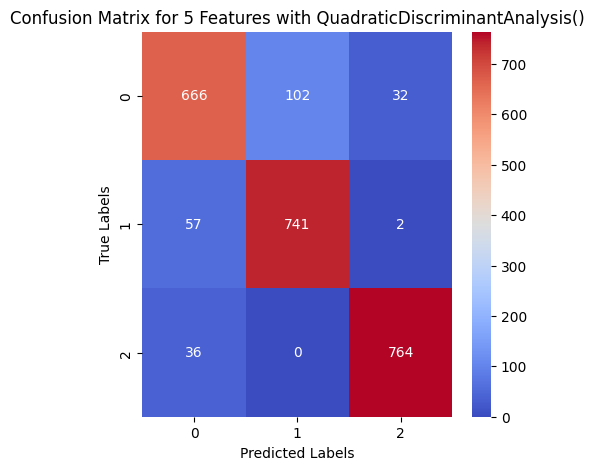


Accuracy: 0.9046
Sensitivity: 0.9212
Specificity: 0.8790
F1-score: 0.8934
False Positive Rate: 0.1210
False Negative Rate: 0.0788



Test performance using the best number of features for MLPClassifier() :

Number of Features: 5


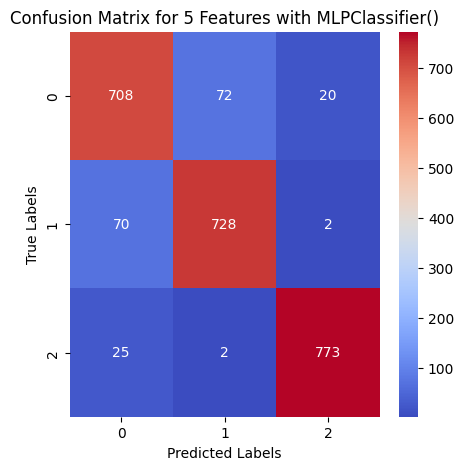


Accuracy: 0.9204
Sensitivity: 0.9100
Specificity: 0.9100
F1-score: 0.9089
False Positive Rate: 0.0900
False Negative Rate: 0.0900



Test performance using the best number of features for GaussianNB() :

Number of Features: 6


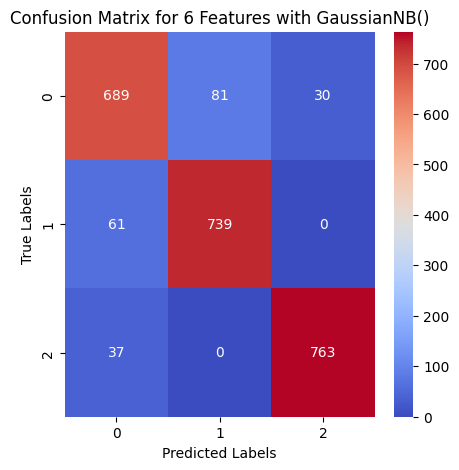


Accuracy: 0.9129
Sensitivity: 0.9187
Specificity: 0.9012
F1-score: 0.9066
False Positive Rate: 0.0988
False Negative Rate: 0.0813



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 6


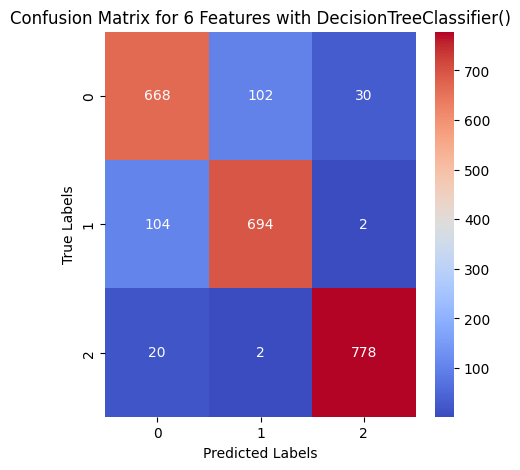


Accuracy: 0.8917
Sensitivity: 0.8653
Specificity: 0.8719
F1-score: 0.8664
False Positive Rate: 0.1281
False Negative Rate: 0.1347



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 6


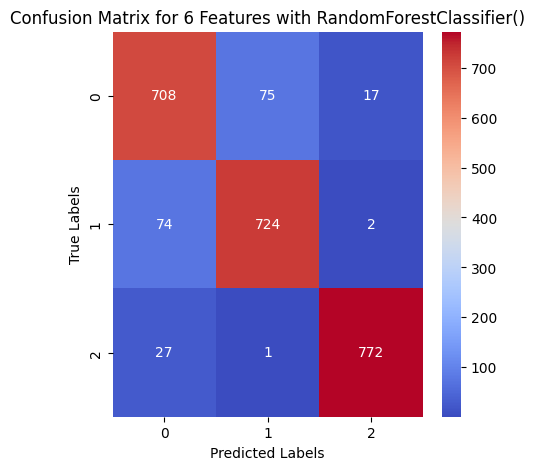


Accuracy: 0.9183
Sensitivity: 0.9054
Specificity: 0.9061
F1-score: 0.9048
False Positive Rate: 0.0939
False Negative Rate: 0.0946



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 6


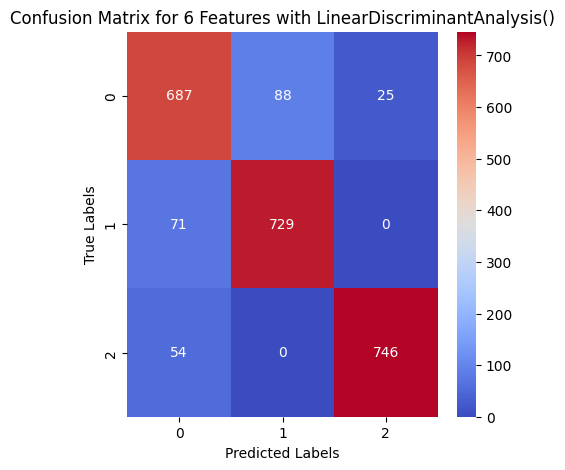


Accuracy: 0.9008
Sensitivity: 0.9063
Specificity: 0.8923
F1-score: 0.8963
False Positive Rate: 0.1077
False Negative Rate: 0.0937



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 6


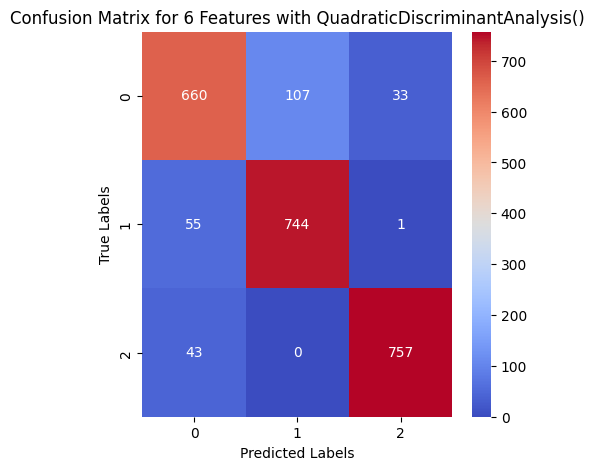


Accuracy: 0.9004
Sensitivity: 0.9231
Specificity: 0.8743
F1-score: 0.8907
False Positive Rate: 0.1257
False Negative Rate: 0.0769



Test performance using the best number of features for MLPClassifier() :

Number of Features: 6


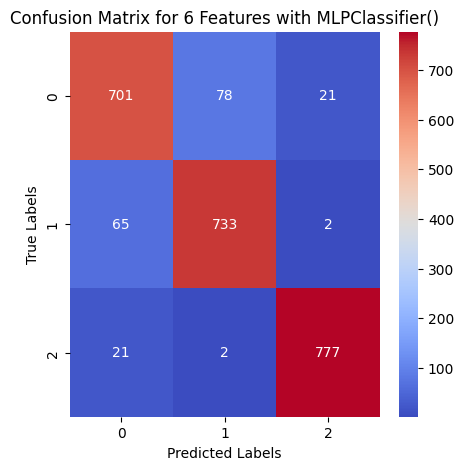


Accuracy: 0.9213
Sensitivity: 0.9151
Specificity: 0.9038
F1-score: 0.9074
False Positive Rate: 0.0962
False Negative Rate: 0.0849



Test performance using the best number of features for GaussianNB() :

Number of Features: 7


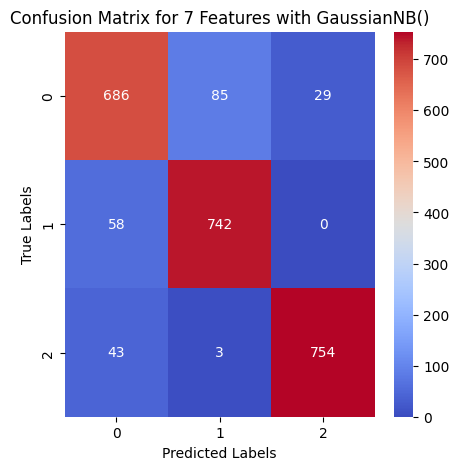


Accuracy: 0.9092
Sensitivity: 0.9220
Specificity: 0.8972
F1-score: 0.9056
False Positive Rate: 0.1028
False Negative Rate: 0.0780



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 7


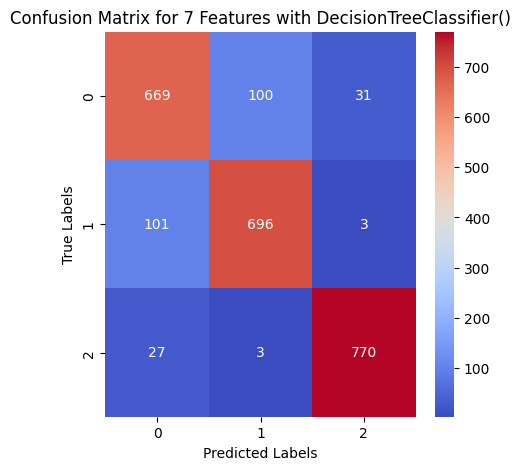


Accuracy: 0.8896
Sensitivity: 0.8688
Specificity: 0.8744
F1-score: 0.8694
False Positive Rate: 0.1256
False Negative Rate: 0.1312



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 7


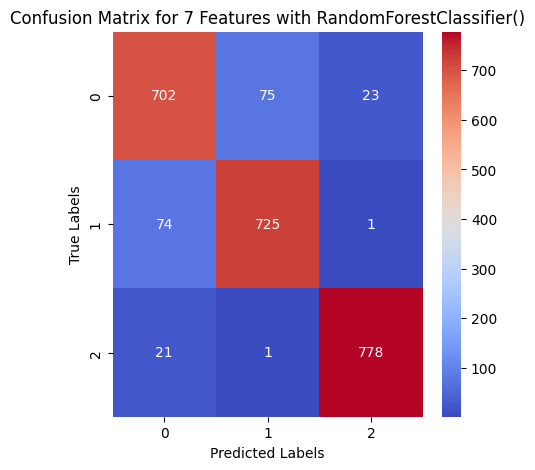


Accuracy: 0.9187
Sensitivity: 0.9046
Specificity: 0.9062
F1-score: 0.9041
False Positive Rate: 0.0938
False Negative Rate: 0.0954



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 7


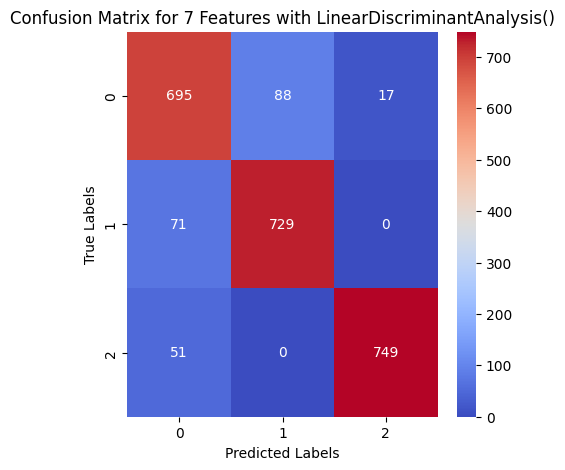


Accuracy: 0.9054
Sensitivity: 0.9073
Specificity: 0.8923
F1-score: 0.8974
False Positive Rate: 0.1077
False Negative Rate: 0.0927



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 7


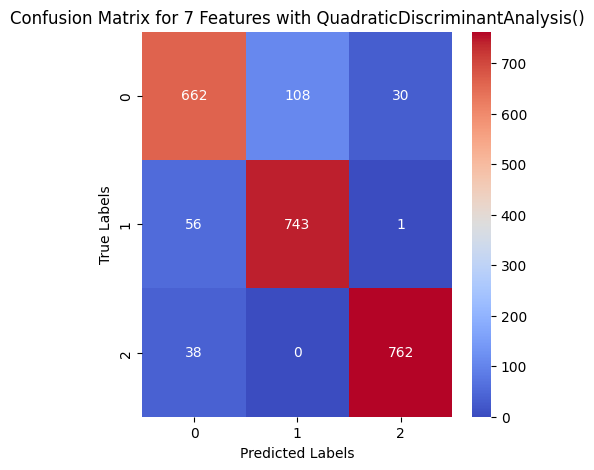


Accuracy: 0.9029
Sensitivity: 0.9220
Specificity: 0.8731
F1-score: 0.8898
False Positive Rate: 0.1269
False Negative Rate: 0.0780



Test performance using the best number of features for MLPClassifier() :

Number of Features: 7


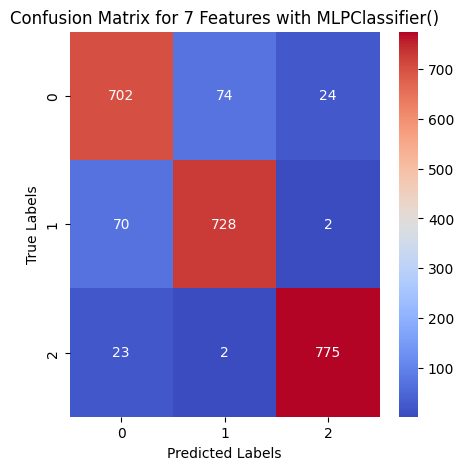


Accuracy: 0.9187
Sensitivity: 0.9093
Specificity: 0.9077
F1-score: 0.9070
False Positive Rate: 0.0923
False Negative Rate: 0.0907



Test performance using the best number of features for GaussianNB() :

Number of Features: 8


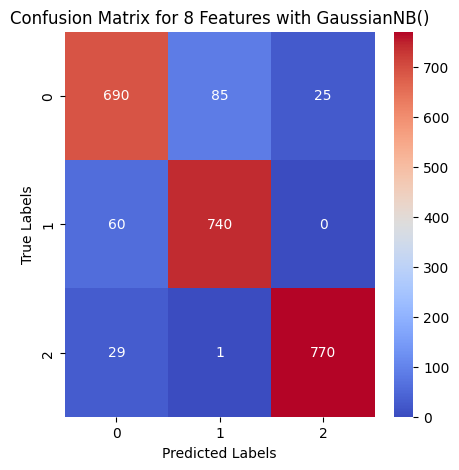


Accuracy: 0.9167
Sensitivity: 0.9200
Specificity: 0.8970
F1-score: 0.9049
False Positive Rate: 0.1030
False Negative Rate: 0.0800



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 8


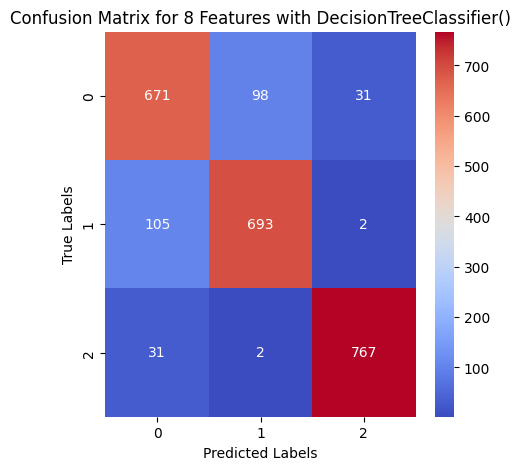


Accuracy: 0.8879
Sensitivity: 0.8647
Specificity: 0.8761
F1-score: 0.8686
False Positive Rate: 0.1239
False Negative Rate: 0.1353



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 8


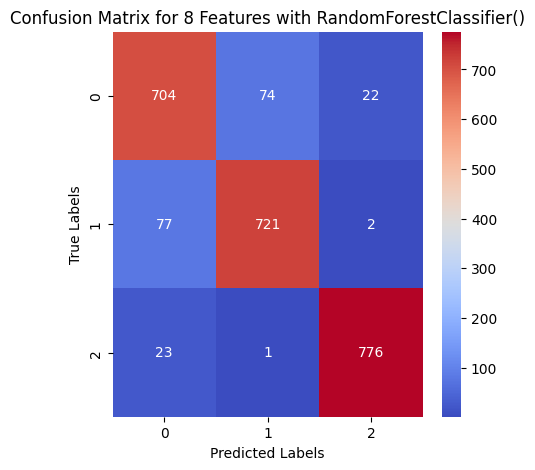


Accuracy: 0.9171
Sensitivity: 0.9014
Specificity: 0.9069
F1-score: 0.9031
False Positive Rate: 0.0931
False Negative Rate: 0.0986



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 8


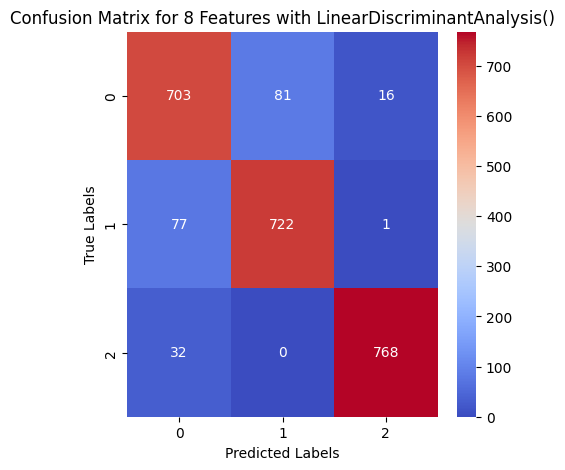


Accuracy: 0.9137
Sensitivity: 0.9013
Specificity: 0.8991
F1-score: 0.8990
False Positive Rate: 0.1009
False Negative Rate: 0.0987



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 8


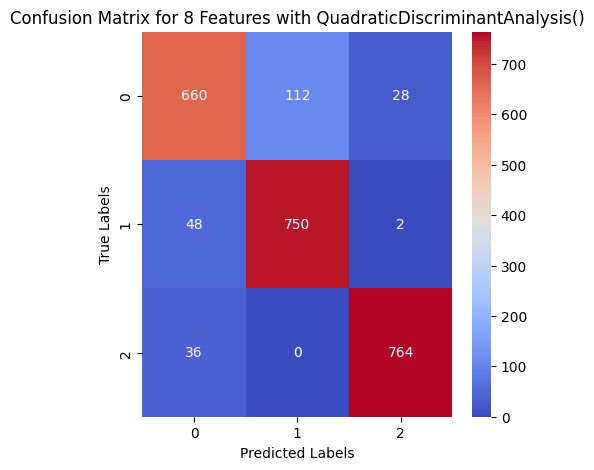


Accuracy: 0.9058
Sensitivity: 0.9322
Specificity: 0.8701
F1-score: 0.8919
False Positive Rate: 0.1299
False Negative Rate: 0.0678



Test performance using the best number of features for MLPClassifier() :

Number of Features: 8


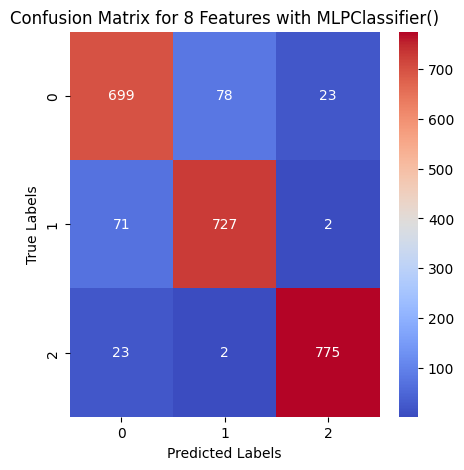


Accuracy: 0.9171
Sensitivity: 0.9078
Specificity: 0.9031
F1-score: 0.9037
False Positive Rate: 0.0969
False Negative Rate: 0.0922



Test performance using the best number of features for GaussianNB() :

Number of Features: 9


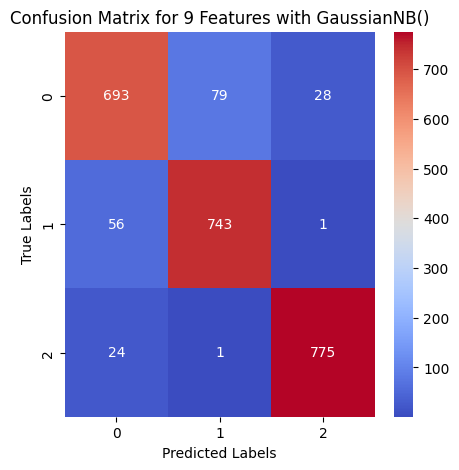


Accuracy: 0.9213
Sensitivity: 0.9252
Specificity: 0.9039
F1-score: 0.9112
False Positive Rate: 0.0961
False Negative Rate: 0.0748



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 9


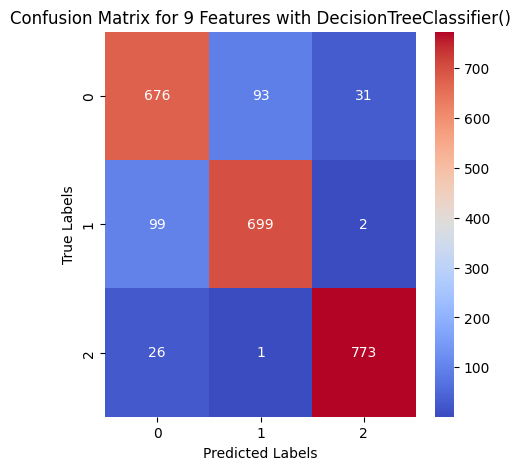


Accuracy: 0.8950
Sensitivity: 0.8723
Specificity: 0.8826
F1-score: 0.8756
False Positive Rate: 0.1174
False Negative Rate: 0.1277



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 9


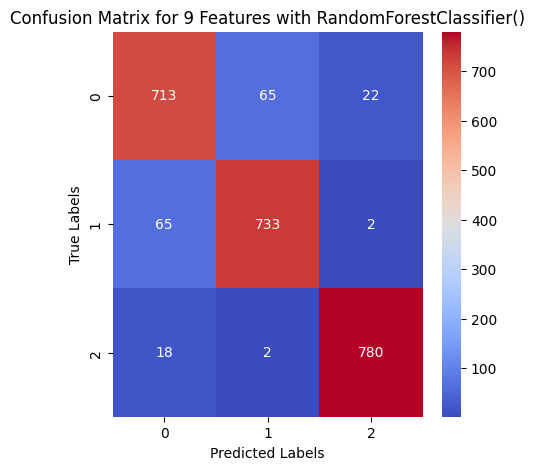


Accuracy: 0.9275
Sensitivity: 0.9165
Specificity: 0.9185
F1-score: 0.9165
False Positive Rate: 0.0815
False Negative Rate: 0.0835



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 9


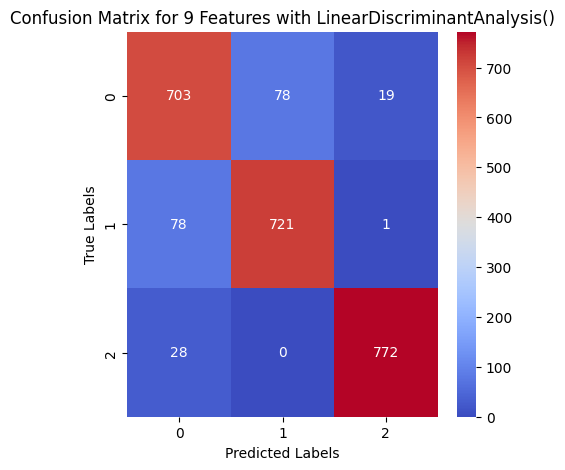


Accuracy: 0.9150
Sensitivity: 0.9001
Specificity: 0.9024
F1-score: 0.9001
False Positive Rate: 0.0976
False Negative Rate: 0.0999



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 9


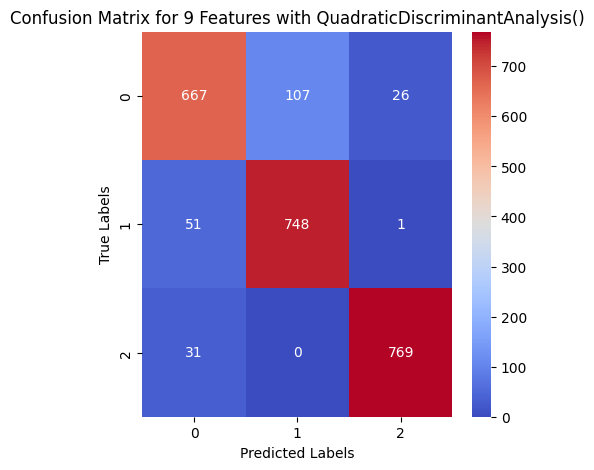


Accuracy: 0.9100
Sensitivity: 0.9290
Specificity: 0.8749
F1-score: 0.8941
False Positive Rate: 0.1251
False Negative Rate: 0.0710



Test performance using the best number of features for MLPClassifier() :

Number of Features: 9


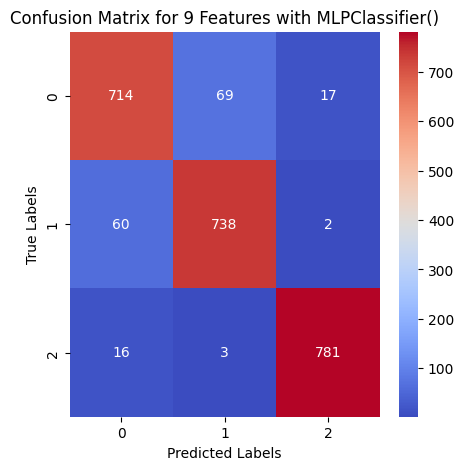


Accuracy: 0.9304
Sensitivity: 0.9225
Specificity: 0.9145
F1-score: 0.9171
False Positive Rate: 0.0855
False Negative Rate: 0.0775



Test performance using the best number of features for GaussianNB() :

Number of Features: 10


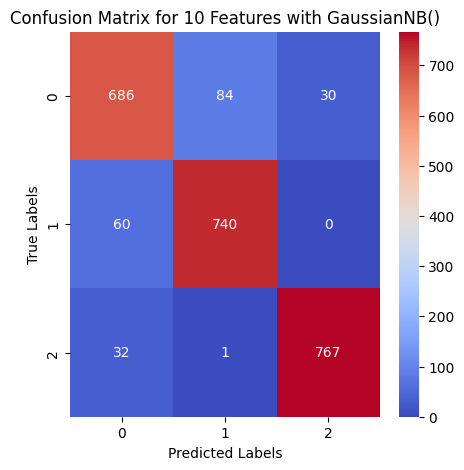


Accuracy: 0.9137
Sensitivity: 0.9196
Specificity: 0.8981
F1-score: 0.9050
False Positive Rate: 0.1019
False Negative Rate: 0.0804



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 10


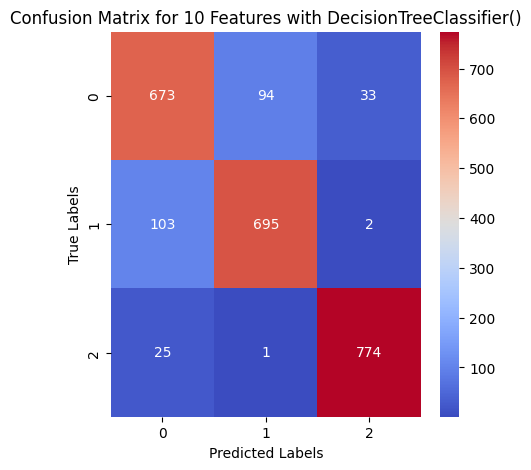


Accuracy: 0.8925
Sensitivity: 0.8673
Specificity: 0.8809
F1-score: 0.8723
False Positive Rate: 0.1191
False Negative Rate: 0.1327



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 10


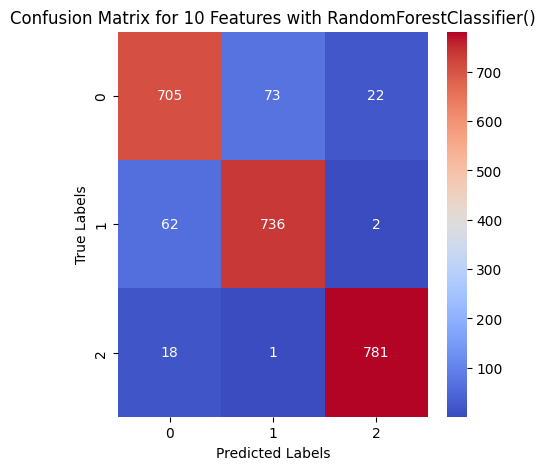


Accuracy: 0.9258
Sensitivity: 0.9192
Specificity: 0.9098
F1-score: 0.9126
False Positive Rate: 0.0902
False Negative Rate: 0.0808



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 10


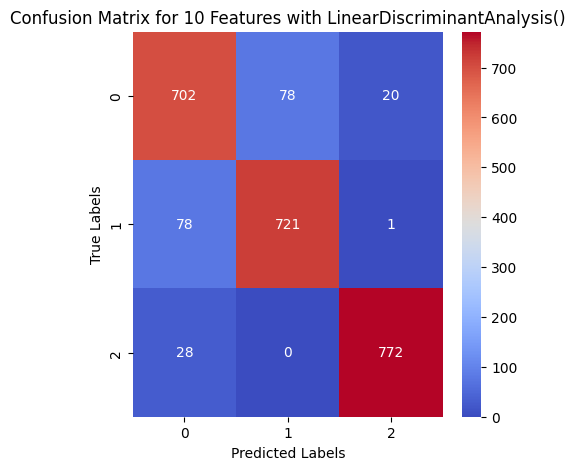


Accuracy: 0.9146
Sensitivity: 0.9000
Specificity: 0.9024
F1-score: 0.9000
False Positive Rate: 0.0976
False Negative Rate: 0.1000



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 10


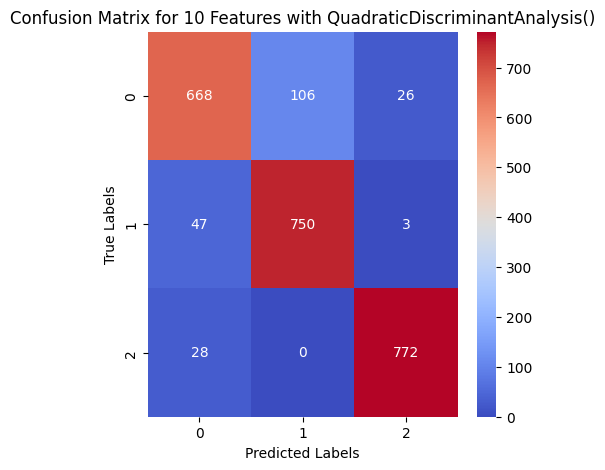


Accuracy: 0.9125
Sensitivity: 0.9343
Specificity: 0.8762
F1-score: 0.8972
False Positive Rate: 0.1238
False Negative Rate: 0.0657



Test performance using the best number of features for MLPClassifier() :

Number of Features: 10


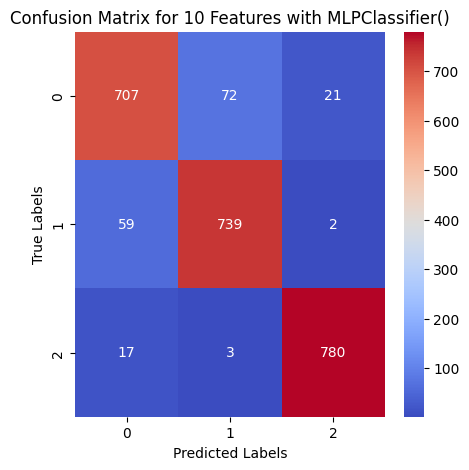


Accuracy: 0.9275
Sensitivity: 0.9230
Specificity: 0.9112
F1-score: 0.9152
False Positive Rate: 0.0888
False Negative Rate: 0.0770



Test performance using the best number of features for GaussianNB() :

Number of Features: 11


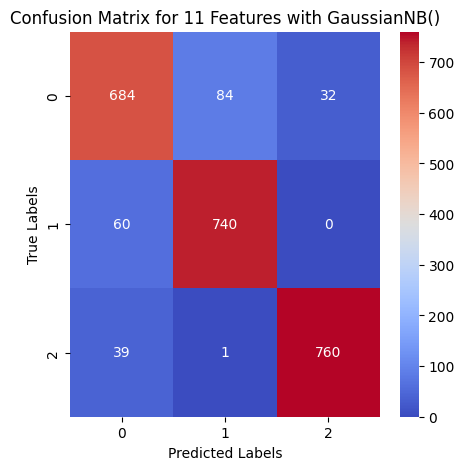


Accuracy: 0.9100
Sensitivity: 0.9194
Specificity: 0.8981
F1-score: 0.9048
False Positive Rate: 0.1019
False Negative Rate: 0.0806



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 11


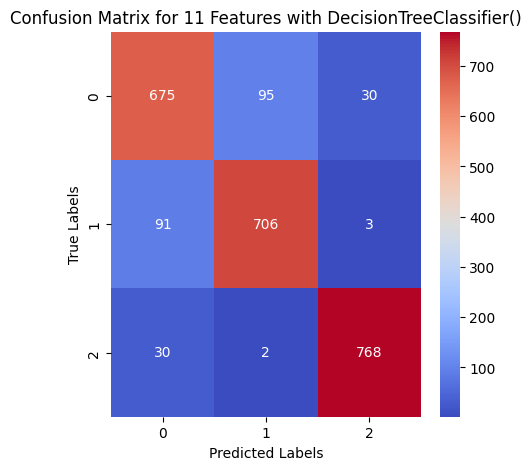


Accuracy: 0.8954
Sensitivity: 0.8812
Specificity: 0.8814
F1-score: 0.8789
False Positive Rate: 0.1186
False Negative Rate: 0.1188



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 11


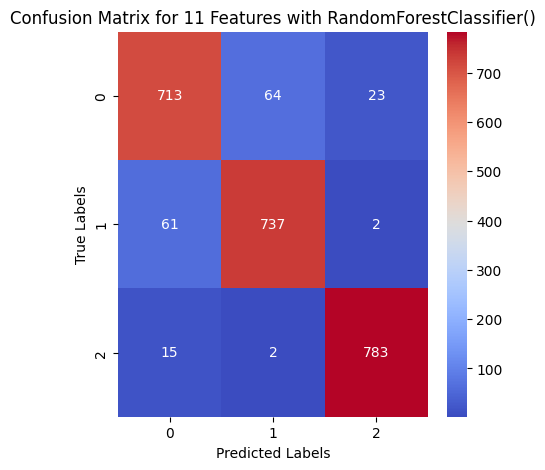


Accuracy: 0.9304
Sensitivity: 0.9212
Specificity: 0.9201
F1-score: 0.9194
False Positive Rate: 0.0799
False Negative Rate: 0.0788



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 11


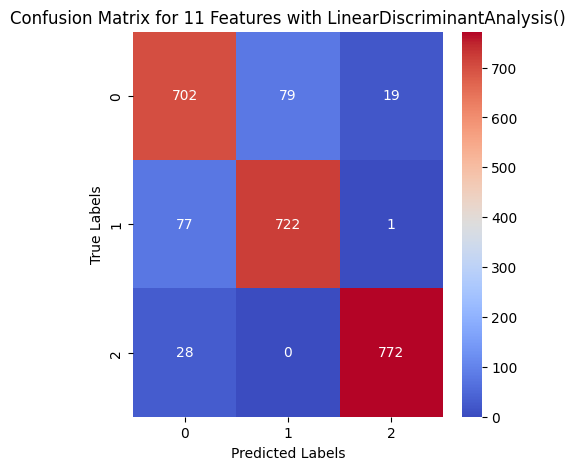


Accuracy: 0.9150
Sensitivity: 0.9012
Specificity: 0.9014
F1-score: 0.9000
False Positive Rate: 0.0986
False Negative Rate: 0.0988



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 11


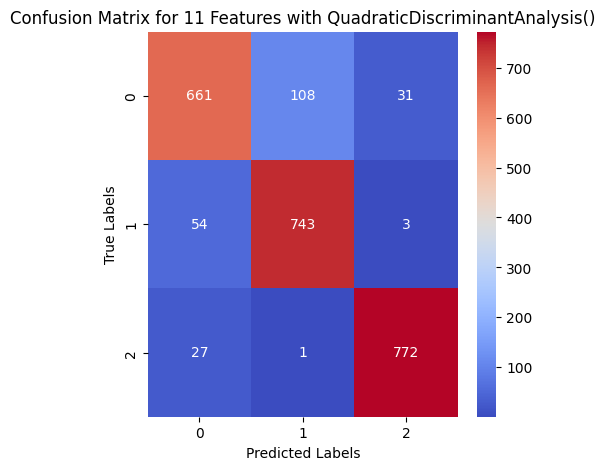


Accuracy: 0.9067
Sensitivity: 0.9245
Specificity: 0.8731
F1-score: 0.8908
False Positive Rate: 0.1269
False Negative Rate: 0.0755



Test performance using the best number of features for MLPClassifier() :

Number of Features: 11


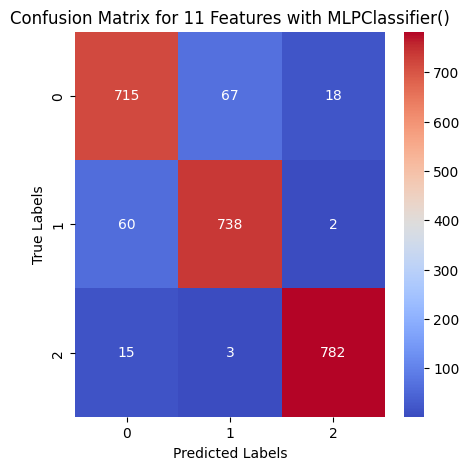


Accuracy: 0.9313
Sensitivity: 0.9226
Specificity: 0.9168
F1-score: 0.9184
False Positive Rate: 0.0832
False Negative Rate: 0.0774



Test performance using the best number of features for GaussianNB() :

Number of Features: 12


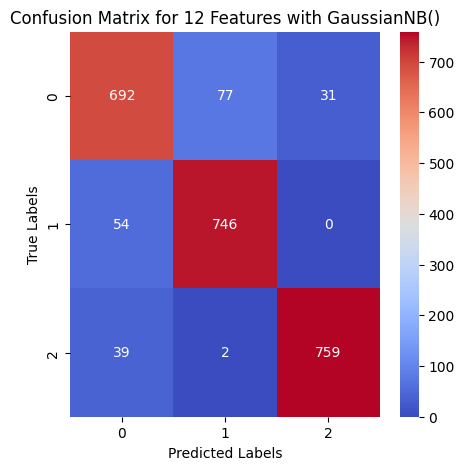


Accuracy: 0.9154
Sensitivity: 0.9276
Specificity: 0.9064
F1-score: 0.9135
False Positive Rate: 0.0936
False Negative Rate: 0.0724



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 12


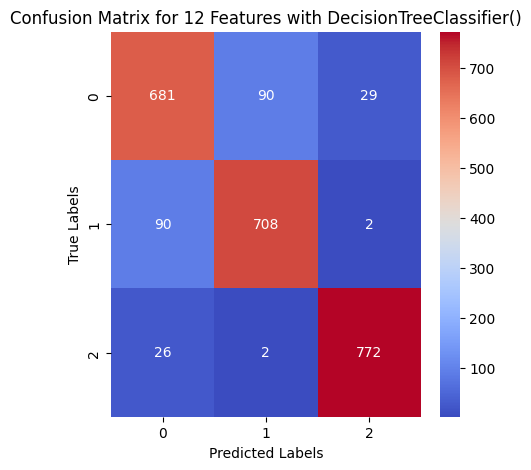


Accuracy: 0.9004
Sensitivity: 0.8833
Specificity: 0.8872
F1-score: 0.8833
False Positive Rate: 0.1128
False Negative Rate: 0.1167



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 12


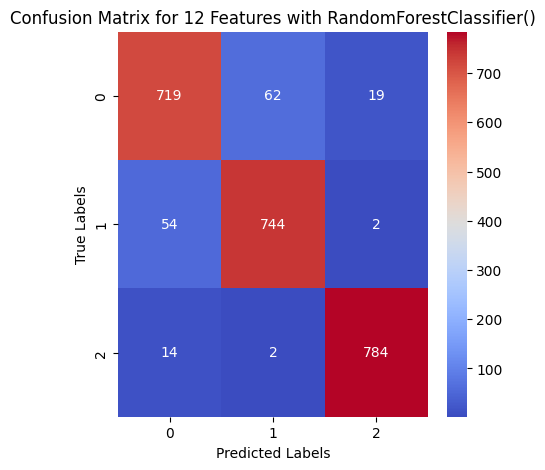


Accuracy: 0.9363
Sensitivity: 0.9301
Specificity: 0.9231
F1-score: 0.9254
False Positive Rate: 0.0769
False Negative Rate: 0.0699



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 12


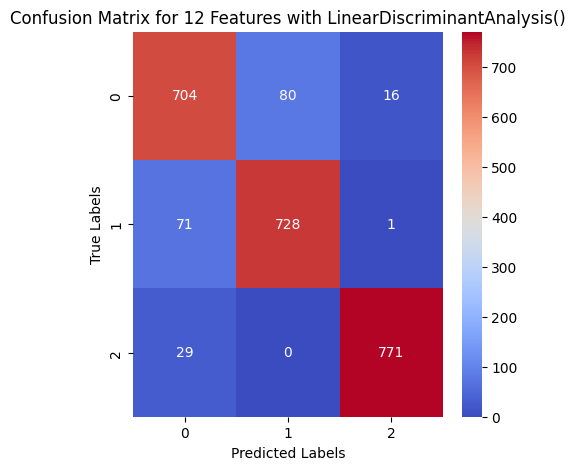


Accuracy: 0.9179
Sensitivity: 0.9084
Specificity: 0.9010
F1-score: 0.9031
False Positive Rate: 0.0990
False Negative Rate: 0.0916



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 12


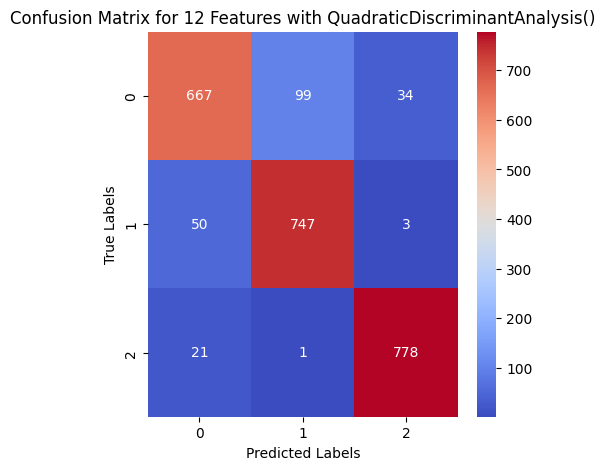


Accuracy: 0.9133
Sensitivity: 0.9303
Specificity: 0.8830
F1-score: 0.8995
False Positive Rate: 0.1170
False Negative Rate: 0.0697



Test performance using the best number of features for MLPClassifier() :

Number of Features: 12


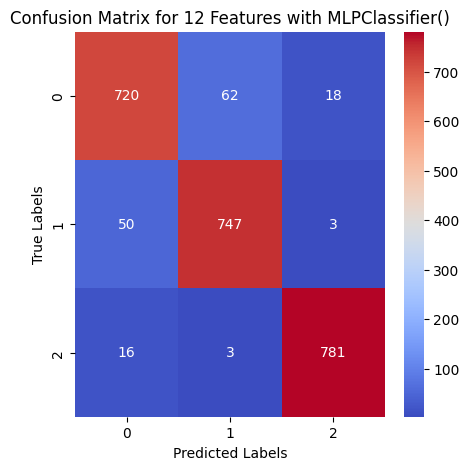


Accuracy: 0.9367
Sensitivity: 0.9351
Specificity: 0.9234
F1-score: 0.9278
False Positive Rate: 0.0766
False Negative Rate: 0.0649



Test performance using the best number of features for GaussianNB() :

Number of Features: 13


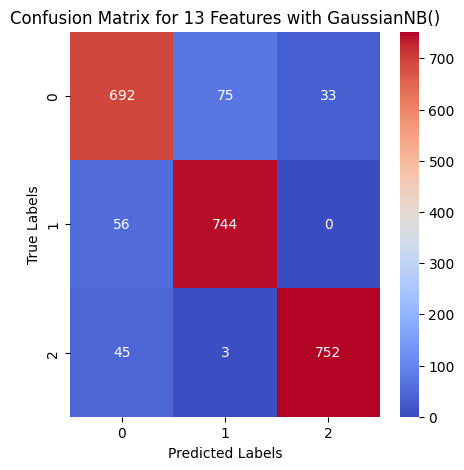


Accuracy: 0.9117
Sensitivity: 0.9251
Specificity: 0.9084
F1-score: 0.9135
False Positive Rate: 0.0916
False Negative Rate: 0.0749



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 13


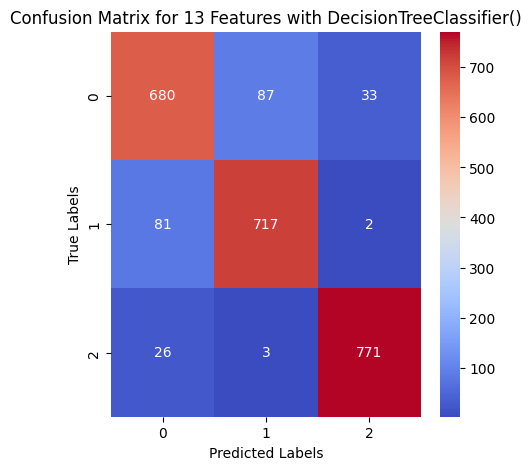


Accuracy: 0.9033
Sensitivity: 0.8936
Specificity: 0.8918
F1-score: 0.8901
False Positive Rate: 0.1082
False Negative Rate: 0.1064



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 13


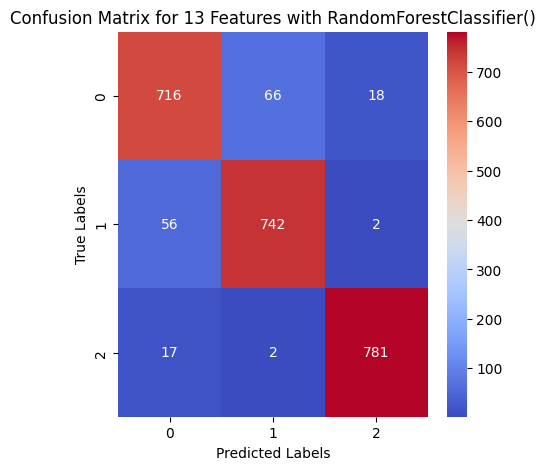


Accuracy: 0.9329
Sensitivity: 0.9275
Specificity: 0.9183
F1-score: 0.9215
False Positive Rate: 0.0817
False Negative Rate: 0.0725



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 13


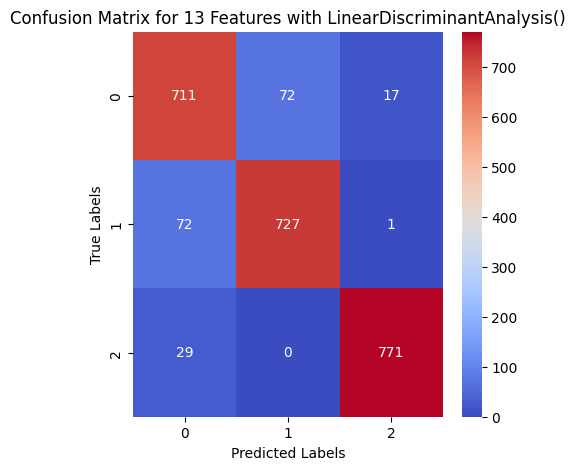


Accuracy: 0.9204
Sensitivity: 0.9080
Specificity: 0.9099
F1-score: 0.9080
False Positive Rate: 0.0901
False Negative Rate: 0.0920



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 13


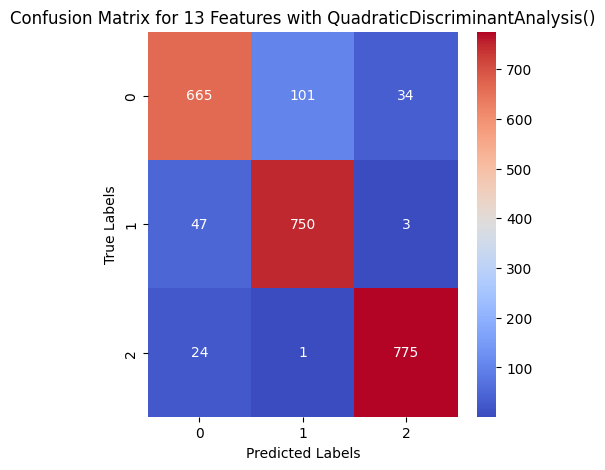


Accuracy: 0.9125
Sensitivity: 0.9340
Specificity: 0.8813
F1-score: 0.8999
False Positive Rate: 0.1187
False Negative Rate: 0.0660



Test performance using the best number of features for MLPClassifier() :

Number of Features: 13


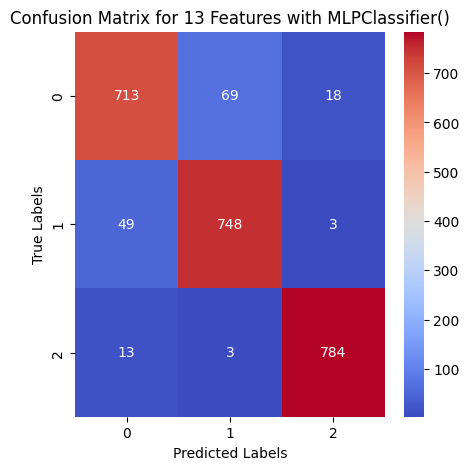


Accuracy: 0.9354
Sensitivity: 0.9357
Specificity: 0.9155
F1-score: 0.9236
False Positive Rate: 0.0845
False Negative Rate: 0.0643



Test performance using the best number of features for GaussianNB() :

Number of Features: 14


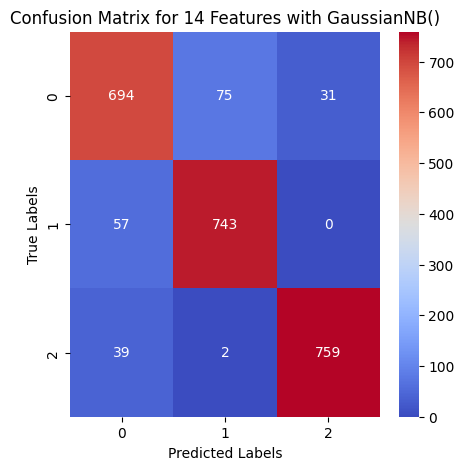


Accuracy: 0.9150
Sensitivity: 0.9241
Specificity: 0.9083
F1-score: 0.9132
False Positive Rate: 0.0917
False Negative Rate: 0.0759



Test performance using the best number of features for DecisionTreeClassifier() :

Number of Features: 14


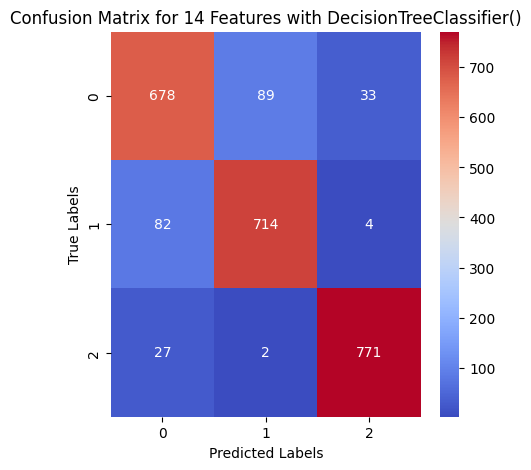


Accuracy: 0.9012
Sensitivity: 0.8921
Specificity: 0.8892
F1-score: 0.8880
False Positive Rate: 0.1108
False Negative Rate: 0.1079



Test performance using the best number of features for RandomForestClassifier() :

Number of Features: 14


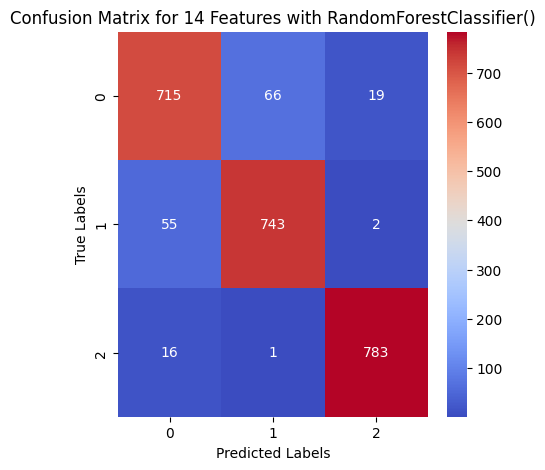


Accuracy: 0.9337
Sensitivity: 0.9286
Specificity: 0.9184
F1-score: 0.9220
False Positive Rate: 0.0816
False Negative Rate: 0.0714



Test performance using the best number of features for LinearDiscriminantAnalysis() :

Number of Features: 14


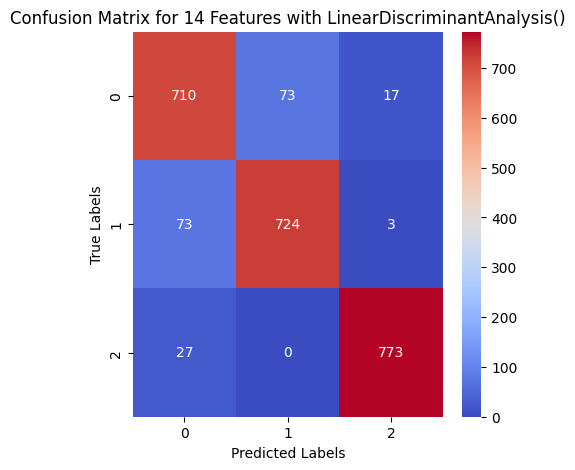


Accuracy: 0.9196
Sensitivity: 0.9068
Specificity: 0.9084
F1-score: 0.9068
False Positive Rate: 0.0916
False Negative Rate: 0.0932



Test performance using the best number of features for QuadraticDiscriminantAnalysis() :

Number of Features: 14


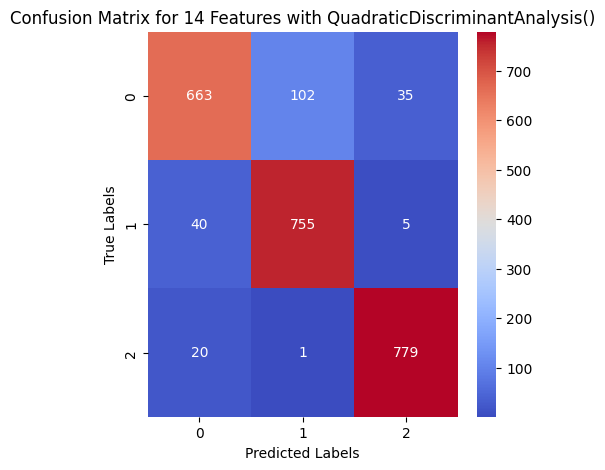


Accuracy: 0.9154
Sensitivity: 0.9431
Specificity: 0.8810
F1-score: 0.9033
False Positive Rate: 0.1190
False Negative Rate: 0.0569



Test performance using the best number of features for MLPClassifier() :

Number of Features: 14


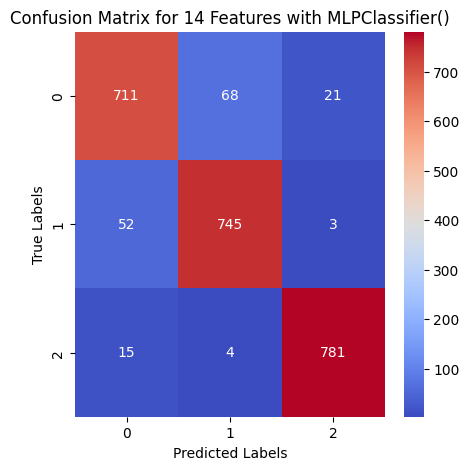


Accuracy: 0.9321
Sensitivity: 0.9318
Specificity: 0.9164
F1-score: 0.9222
False Positive Rate: 0.0836
False Negative Rate: 0.0682





In [ ]:
for i in range(1, 15):
    features = X_SC[:, :i]
    for clf_name in classifiers:
        y_pred = cross_val_predict(clf_name, features, y_SC, cv=8)
        confusion_mat = confusion_matrix(y_SC, y_pred)
        TP = confusion_mat[0, 0]
        FP = confusion_mat[0, 1]
        FN = confusion_mat[1, 0]
        TN = confusion_mat[1, 1]
        overall_best_acc = accuracy_score(y_SC, y_pred)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        precision = TP / (TP + FP)
        F1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
        false_pos_rate = FP / (FP + TN)
        false_neg_rate = FN / (TP + FN)
        print("Test performance using the best number of features for", clf_name, ":\n")
        print("Number of Features: {}".format(i))
        plt.figure(figsize=(5,5)) # plot the confusion matrix
        sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', fmt='g')
        plt.title('Confusion Matrix for {} Features with {}'.format(i, clf_name))
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
        print("\nAccuracy: {:.4f}".format(overall_best_acc))
        print("Sensitivity: {:.4f}".format(sensitivity))
        print("Specificity: {:.4f}".format(specificity))
        print("F1-score: {:.4f}".format(F1_score))
        print("False Positive Rate: {:.4f}".format(false_pos_rate))
        print("False Negative Rate: {:.4f}\n\n".format(false_neg_rate))
        print()